In [5]:
#Create Ori clearance rate column

clearance_rates = murders.groupby(['Ori','Solved'])['Month'].count()
clearance_rates = clearance_rates.unstack()
clearance_rates.fillna(0, inplace = True)
clearance_rates['Clearance'] = clearance_rates.Yes/(clearance_rates.Yes + clearance_rates.No)
clearance_dict = dict(zip(clearance_rates.index, clearance_rates.Clearance))
clearance_dict

murders['OriClearance'] = murders.Ori.apply(lambda x: clearance_dict.get(x))

Text(0, 0.5, 'Observations')

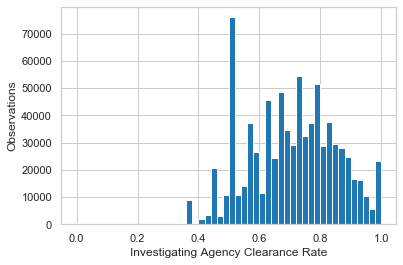

In [6]:
plt.hist(murders.OriClearance, bins = 50)
plt.xlabel('Investigating Agency Clearance Rate')
plt.ylabel('Observations')

In [4]:
murders.nunique()

Ori          12936
Agentype         7
Solved           2
Month           12
Homicide         2
Situation        6
VicAge         101
VicSex           3
VicRace          6
VicEthnic        3
Weapon          17
VicCount        13
MSA            409
dtype: int64

In [123]:
# Check number of observations with unknown victim gender
murders.VicSex.value_counts(normalize = True)

Male      0.775663
Female    0.224337
Name: VicSex, dtype: float64

The observations with unknown gender represent a tiny portion of the dataset and could be accurate representations of victim remains found. 'Unknown' will be allowed to remain as a category within the feature.

In [37]:
murders.VicRace.value_counts()

White                                  397633
Black                                  380396
Asian                                   11554
Unknown                                  8957
American Indian or Alaskan Native        6086
Native Hawaiian or Pacific Islander        92
Name: VicRace, dtype: int64

Similar to gender, the observations with unknown race represent a tiny portion of the dataset and could be accurate representations of victim remains found. 'Unknown' will be allowed to remain as a category within the feature.

In [39]:
murders.Weapon.value_counts()

Gun                                     535040
Knife or cutting instrument             117868
Personal weapons, includes beating       46269
Other or type unknown                    41648
Blunt object - hammer, club, etc         35638
Strangulation - hanging                  10038
Fire                                      7769
Asphyxiation - includes death by gas      4954
Narcotics or drugs, sleeping pills        2538
Drowning                                  1503
Explosives                                 625
Poison - does not include gas              569
Pushed or thrown out window                259
Name: Weapon, dtype: int64

In [40]:
murders_no_unknowns = murders_no_unknowns[murders_no_unknowns.Weapon != 'Other or type unknown']
murders_no_unknowns.Weapon.value_counts()

Gun                                     524678
Knife or cutting instrument             115321
Personal weapons, includes beating       44907
Blunt object - hammer, club, etc         34750
Strangulation - hanging                   9735
Fire                                      7413
Asphyxiation - includes death by gas      4770
Narcotics or drugs, sleeping pills        2451
Drowning                                  1451
Explosives                                 616
Poison - does not include gas              555
Pushed or thrown out window                257
Name: Weapon, dtype: int64

In [41]:
murders.VicEthnic.value_counts()

Unknown or not reported    479154
Not of Hispanic origin     241188
Hispanic origin             84376
Name: VicEthnic, dtype: int64

Unfortunately, the 'VicEthnic' feature contains an enormous number of unknowns - over half the original dataset

For now, I will create one no_unknowns dataset that includes 'VicEthnic' unknowns and one that excludes them